<a href="https://colab.research.google.com/github/JJJJeon/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%AA%A8%EB%8D%B8%EC%B7%A8%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터셋 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
train = pd.read_csv('/content/train 지역변수 추가.csv')
test = pd.read_csv('/content/test 지역변수 추가.csv')

In [ ]:
# train = pd.read_csv("/content/train 지역변수 추가.csv")
# test = pd.read_csv("/content/test 지역변수 추가.csv")
# sb = pd.read_csv("/content/submission_sample.csv")

In [5]:
test.head(3)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,hospital_count
0,2,NaN,incheon,139,19981125.00,300.00,general_hospital,66824864410.00,0.00,65657092101.00,...,50684431667.00,37143344381.00,4720000000.00,4690000000.00,16085395374.00,8944587276.00,693.00,693.00,same,1.00
1,5,NaN,jeju,149,20160309.00,44.00,hospital,34957575568.00,0.00,32592697196.00,...,42098280733.00,24200000000.00,25210094437.00,18300000000.00,3789134965.00,0.00,379.00,371.00,same,1.00
2,6,NaN,jeonnam,103,19890427.00,276.00,general_hospital,23260305967.00,2542570943.00,23087485220.00,...,27775892339.00,21822782890.00,0.00,0.00,0.00,16385400958.00,NaN,NaN,NaN,3.00


In [6]:
train.head(3)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,hospital_count
0,1,open,choongnam,73,20071228,175.00,nursing_hospital,4217530010.00,0.00,3961134739.00,...,222876855.00,0.00,536116887.00,390000000.00,2619290493.00,1271224493.00,62.00,64.00,same,14.00
1,3,open,gyeongnam,32,19970401,410.00,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,801.00,813.00,same,5.00
2,4,open,gyeonggi,89,20161228,468.00,nursing_hospital,1004521989.00,515483669.00,447219722.00,...,0.00,0.00,0.00,0.00,0.00,0.00,234.00,1.00,same,17.00


In [7]:
train.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,hospital_count
count,301.00,301.00,301.00,296.00,293.00,293.00,293.00,293.00,293.00,293.00,...,293.00,293.00,293.00,293.00,293.00,293.00,293.00,291.00,288.00,299.00
mean,219.06,81.04,20050125.80,145.71,12881747447.99,2014902794.59,10332439064.09,5654114566.90,269615124.57,511587022.57,...,8146026488.79,3860583593.41,1510050431.99,4471247363.88,2709978815.42,5273919018.09,978627865.26,142.55,134.33,10.23
std,121.23,50.97,88938.15,118.92,20435433475.62,7460270656.57,14938862491.95,8083342530.26,802370115.51,1060379255.45,...,12557995349.37,6797242094.08,2953412250.37,7659580436.40,4564001071.00,10812593821.25,4688797890.98,160.19,151.06,6.22
min,1.00,1.00,19780124.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-20147802018.00,-2781506722.00,0.00,0.00,1.00
25%,112.00,37.00,20011017.00,52.75,3252111902.00,0.00,2758200772.00,1626052720.00,8217133.00,80133952.00,...,1283220350.00,285574118.00,0.00,25578782.00,0.00,1017572570.00,0.00,53.50,53.75,5.00
50%,230.00,75.00,20071126.00,136.50,5524218104.00,210410492.00,4684074465.00,2659892367.00,43637641.00,183196506.00,...,3784552900.00,1454049945.00,85425488.00,1969746813.00,1100000000.00,2894969804.00,0.00,80.00,79.00,10.00
75%,321.00,123.00,20111021.00,193.00,12748392940.00,910527771.00,10778762060.00,6363400069.00,205033071.00,420333030.00,...,8465053127.00,4364713622.00,1567966980.00,4905441439.00,3360000000.00,5370284792.00,101444685.00,181.50,170.00,15.50
max,428.00,178.00,20170607.00,656.00,151000000000.00,98503322990.00,103000000000.00,64035593950.00,9144170639.00,8686379500.00,...,85088583901.00,68468775764.00,17593752360.00,51503883627.00,32561472110.00,125000000000.00,68527297093.00,1200.00,1200.00,20.00


#### **변수설명**
> `inst_id` - 각 파일에서의 병원 고유 번호
`OC` – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함    
`sido` – 병원의 광역 지역 정보    
`sgg` – 병원의 시군구 자료     
`openDate` – 병원 설립일    
`bedCount` - 병원이 갖추고 있는 병상의 수       
`instkind` – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류    
·        종합병원 : 입원환자 100명 이상 수용 가능    
·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능     
·        의원 : 입원 환자 30명 이하 수용 가능      
·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.    
`revenue1` – 매출액 / salescost1 – 매출원가      
`sga1` - 판매비와 관리비 / salary1 – 급여   
`noi1` – 영업외수익 / noe1 – 영업외비용      
`Interest1` – 이자비용 / ctax1 – 법인세비용     
`Profit1` – 당기순이익 / liquidAsset1 – 유동자산      
`quickAsset1` – 당좌자산 / receivableS1 - 미수금(단기)       
`inventoryAsset1` – 재고자산 / nonCAsset1 – 비유동자산     
`tanAsset1` – 유형자산 / OnonCAsset1 - 기타 비유동자산       
`receivableL1` – 장기미수금 / debt1 – 부채총계      
`liquidLiabilities1` – 유동부채 / shortLoan1 – 단기차입금    
`NCLiabilities1` – 비유동부채 / longLoan1 – 장기차입금    
`netAsset1` – 순자산총계 / surplus1 – 이익잉여금    
`employee1` – 고용한 총 직원의 수     
`ownerChange` – 대표자의 변동 

# 2. EDA 및 전처리

In [8]:
train.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [9]:
test.isnull().sum()

inst_id                 0
OC                    127
sido                    0
sgg                     0
openDate                1
bedCount                8
instkind                2
revenue1                2
salescost1              2
sga1                    2
salary1                 2
noi1                    2
noe1                    2
interest1               2
ctax1                   2
profit1                 2
liquidAsset1            2
quickAsset1             2
receivableS1            2
inventoryAsset1         2
nonCAsset1              2
tanAsset1               2
OnonCAsset1             2
receivableL1            2
debt1                   2
liquidLiabilities1      2
shortLoan1              2
NCLiabilities1          2
longLoan1               2
netAsset1               2
surplus1                2
revenue2                2
salescost2              2
sga2                    2
salary2                 2
noi2                    2
noe2                    2
interest2               2
ctax2       

### (1) 레이블 데이터 : 인코딩

In [10]:
from sklearn.preprocessing import LabelEncoder

# OC : 'close': 0, 'open': 1 처리해주기
print(train['OC'].value_counts()) #인코딩전 확인
encoder1 = LabelEncoder()
train['OC']=encoder1.fit_transform(train['OC'])
print(train['OC'].value_counts()) #인코딩후 확인

# 테스트데이터셋은 OC가 모두 NaN이므로 레이블인코딩 처리x

open      286
 close     15
Name: OC, dtype: int64
1    286
0     15
Name: OC, dtype: int64


### (2) 피처 데이터 : 결측치 처리 및 인코딩

* 문자열 피처의 결측치는 Not_sure 로 대체.
* 숫자형 피처의 결측치는 -9999 로 대체.


#### (2)-1. ints_id, sgg

In [13]:
# inst_id : 인덱스 중복이므로 열 버리기
# sgg : sido와 정보가 겹치므로 열 버리기
train.drop(['inst_id','sgg'],axis=1,inplace=True)
test.drop(['inst_id','sgg'],axis=1,inplace=True)

KeyError: ignored

#### (2)-2. 문자열 피처

In [12]:
## 문자열 피처에서 결측치가 존재할 경우, 'Not_sure'로 대체
# 문자열 피처중 instkind, ownerChange 에서 결측치 존재

train['instkind'] = train['instkind'].fillna('Not_sure')
test['instkind'] = test['instkind'].fillna('Not_sure')

train['ownerChange'] = train['ownerChange'].fillna('Not_sure')
test['ownerChange'] = test['ownerChange'].fillna('Not_sure')

#### (2)-3. 숫자형 피처중 금융변수

In [14]:
## 숫자형 피처중 금융변수에서 결측치(NaN) 존재

# open&같은행번호에서 공통적으로 8개의 결측치가 나타난다. 
print(train[train['revenue1'].isnull()]['OC'])
print(train[train['shortLoan2'].isnull()]['OC'])

# 같은행번호에서 공통적으로 2개의 결측치가 나타난다.
print(test[test['revenue1'].isnull()])
print(test[test['shortLoan2'].isnull()])

1      1
14     1
32     1
55     1
60     1
248    1
257    1
258    1
Name: OC, dtype: int64
1      1
14     1
32     1
55     1
60     1
248    1
257    1
258    1
Name: OC, dtype: int64
    OC     sido    openDate  bedCount          instkind  revenue1  salescost1  \
15 NaN    busan 19950330.00    226.00  general_hospital       NaN         NaN   
56 NaN  jeonbuk 20121218.00    539.00  nursing_hospital       NaN         NaN   

    sga1  salary1  noi1  ...  liquidLiabilities2  shortLoan2  NCLiabilities2  \
15   NaN      NaN   NaN  ...                 NaN         NaN             NaN   
56   NaN      NaN   NaN  ...                 NaN         NaN             NaN   

    longLoan2  netAsset2  surplus2  employee1  employee2  ownerChange  \
15        NaN        NaN       NaN     566.00     566.00         same   
56        NaN        NaN       NaN     250.00     200.00         same   

    hospital_count  
15            2.00  
56            6.00  

[2 rows x 57 columns]
    OC     sido    

In [15]:
#NAN인 관측치 처리(dropna)
fin_list=['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2']
train.dropna(subset=fin_list, axis=0,inplace=True)
test.dropna(subset=fin_list, axis=0,inplace=True)
#0인 관측치 처리
train[fin_list]=train[fin_list].replace(0 ,-9999)
test[fin_list]=test[fin_list].replace(0 ,-9999)

In [16]:
## 확인
train.describe()
test.describe()
# 최소값이 -9999로 나타난다.

,OC,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,hospital_count
count,0.00,124.00,117.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,...,125.00,125.00,125.00,125.00,125.00,125.00,125.00,117.00,110.00,123.00
mean,NaN,20051094.52,169.21,18244463540.64,3973316996.92,13404099377.96,7415083481.50,517550943.86,870429839.07,316824605.63,...,11898510453.52,5633430404.30,2181708828.60,6495023576.14,4482679464.70,6116176908.94,1648468118.22,200.77,185.70,5.36
std,NaN,87977.09,122.32,31335295203.80,14199484016.62,20544811497.04,12100434313.87,1193138748.39,1804461563.60,458778630.57,...,19711821181.87,9662048497.46,4952450662.56,12036734451.61,7517021833.95,9813462299.32,4779445755.36,277.61,242.55,3.68
min,NaN,19760409.00,0.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,...,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-2955957091.00,-8600000000.00,16.00,0.00,1.00
25%,NaN,20000876.00,94.00,3235888530.00,-9999.00,3083860292.00,1666742310.00,16410940.00,83655518.00,52591629.00,...,1679896491.00,391415567.00,-9999.00,132136760.00,-9999.00,949265633.00,-9999.00,59.00,54.25,2.00
50%,NaN,20071066.00,154.00,6637115540.00,189692304.00,5716501623.00,3263054070.00,53191709.00,231519005.00,150785906.00,...,4494217146.00,1554505639.00,300000000.00,2030000000.00,1750000000.00,2427138957.00,-9999.00,104.00,97.00,4.00
75%,NaN,20113446.50,212.00,17040391156.00,1192329214.00,14452425786.00,7198103374.00,371459225.00,663350300.00,338427728.00,...,14120305387.00,6586241453.00,2650000000.00,5700000000.00,4857047850.00,5881964991.00,693516549.00,222.00,231.75,7.50
max,NaN,20170531.00,771.00,181000000000.00,116000000000.00,127000000000.00,82395611833.00,7302719335.00,11496795211.00,2573803974.00,...,131000000000.00,52414267533.00,37143344381.00,78556538604.00,36202877976.00,49244922328.00,25617866194.00,1816.00,1547.00,13.00


#### (2)-4. bedcount, employee



In [17]:
## 숫자형 피처의 결측치는 -9999로 대체
train['bedCount']=train['bedCount'].fillna(-9999)
test['bedCount']=test['bedCount'].fillna(-9999)

train['employee1']=train['employee1'].fillna(-9999)
test['employee1']=test['employee1'].fillna(-9999)

train['employee2']=train['employee2'].fillna(-9999)
test['employee2']=test['employee2'].fillna(-9999)

#### (2)-5. 피처 인코딩 처리

In [18]:
## 문자열 피처 인코딩 처리
## 전처리 후 마지막에

# sido는 레이블인코딩 (sido의 개별관측치가 많아 원핫인코딩을 하게 되면 변수개수가 너무많아지기 때문.)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['sido'] = encoder.fit_transform(train['sido'])
test['sido'] = encoder.fit_transform(test['sido'])

# instkind, ownerChange는 원핫인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [19]:
## 확인
train.head(3)
# sido는 숫자형변수로, instkind, ownerChange는 더미변수로 잘 바뀜.

,OC,sido,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,ownerChange_Not_sure,ownerChange_change,ownerChange_same
0,1,2,20071228,175.00,4217530010.00,-9999.00,3961134739.00,2033835290.00,15652441.00,15236236.00,...,0,0,0,0,1,0,0,0,0,1
2,1,8,20161228,468.00,1004521989.00,515483669.00,447219722.00,296402310.00,76156.00,30000.00,...,0,0,0,0,1,0,0,0,0,1
3,1,10,20000814,353.00,72507342181.00,-9999.00,70677397660.00,31786048663.00,506223059.00,1259567512.00,...,0,0,1,0,0,0,0,0,0,1


# 3. 파생변수 만들기

### (1) 금융변수

In [20]:
## 성장성
# 매출액 증가율 = 당기매출액/ 전기매출액*100 -100
train['revenueGrowth']=(train['revenue1']/train['revenue2'])*100-100
# 총자산 증가율 = 당기총자산/ 전기총자산*100 -100
train['netAssetGrowth']=(train['netAsset1']+train['debt1'])/(train['netAsset2']+train['debt2'])*100 -100

## 수익성
# 자기자본순이익률(ROE)=당기순이익/자기자본*100
train['ROE']=(train['profit1']/train['netAsset1'])*100
# 매출순이익률 = 당기순이익/매출액*100
train['ROS'] = train.profit1/train.revenue1*100
# 배당성향 = 배당금/당기순이익
train['dividendPayoutRatio'] = (train.profit1-train.surplus1)/train.profit1
# 이자보상비율 = 영업이익/이자비용*100
# (영업손익은 매출액 등의 영업수익으로부터 매출원가ㆍ판매비와관리비 등의 영업비용을 차감한 개념, 영업 외 이익과 비용도 차감)
train['interestCoverageRatio'] = (train.revenue1-train.salescost1-train.sga1-train.noi1-train.noe1)/train.interest1*100

## 안정성
# 유동비율 = 유동자산/유동부채*100 (바람직: 200%이상)
train['liquidRatio']=(train['liquidAsset1']/train['liquidLiabilities1'])*100
# 당좌비율 = 당좌자산/유동부채*100 (바람직: 100%이상)
train['quickRatio']=(train['quickAsset1']/train['liquidLiabilities1'])*100
# 부채비율 = 부채/자본*100
train['debtRatio']=(train['debt1']/(train['debt1']+train['netAsset1']))*100
# 자기자본비율 = 자기자본/총자본*100
train['netAssetRatio']=train.netAsset1/(train.debt1+train.netAsset1)*100

## 활동성
# 재고자산회전율 = 매출원가/평균재고자산
train['inventoryTurnover']=train.salescost1/((train.inventoryAsset1+train.inventoryAsset2)/2)

In [21]:
## 성장성
# 매출액 증가율 = 당기매출액/ 전기매출액*100 -100
test['revenueGrowth']=(test['revenue1']/test['revenue2'])*100-100
# 총자산 증가율 = 당기총자산/ 전기총자산*100 -100
test['netAssetGrowth']=(test['netAsset1']+test['debt1'])/(test['netAsset2']+test['debt2'])*100 -100

## 수익성
# 자기자본순이익률(ROE)=당기순이익/자기자본*100
test['ROE']=(test['profit1']/test['netAsset1'])*100
# 매출순이익률 = 당기순이익/매출액*100
test['ROS'] = test.profit1/test.revenue1*100
# 배당성향 = 배당금/당기순이익
test['dividendPayoutRatio'] = (test.profit1-test.surplus1)/test.profit1
# 이자보상비율 = 영업이익/이자비용*100
# (영업손익은 매출액 등의 영업수익으로부터 매출원가ㆍ판매비와관리비 등의 영업비용을 차감한 개념, 영업 외 이익과 비용도 차감)
test['interestCoverageRatio'] = (test.revenue1-test.salescost1-test.sga1-test.noi1-test.noe1)/test.interest1*100

## 안정성
# 유동비율 = 유동자산/유동부채*100 (바람직: 200%이상)
test['liquidRatio']=(test['liquidAsset1']/test['liquidLiabilities1'])*100
# 당좌비율 = 당좌자산/유동부채*100 (바람직: 100%이상)
test['quickRatio']=(test['quickAsset1']/test['liquidLiabilities1'])*100
# 부채비율 = 부채/자본*100
test['debtRatio']=(test['debt1']/(test['debt1']+test['netAsset1']))*100
# 자기자본비율 = 자기자본/총자본*100
test['netAssetRatio']=test.netAsset1/(test.debt1+test.netAsset1)*100

## 활동성
# 재고자산회전율 = 매출원가/평균재고자산
test['inventoryTurnover']=test.salescost1/((test.inventoryAsset1+test.inventoryAsset2)/2)

In [22]:
## 확인
fin_Ratio_list = ['revenueGrowth', 'netAssetGrowth',
    'ROE', 'ROS', 'dividendPayoutRatio', 'interestCoverageRatio',
    'liquidRatio', 'quickRatio', 'debtRatio','netAssetRatio',
    'inventoryTurnover']
train[fin_Ratio_list].describe()

fin_Ratio_list = ['revenueGrowth', 'netAssetGrowth',
    'ROE', 'ROS', 'dividendPayoutRatio', 'interestCoverageRatio',
    'liquidRatio', 'quickRatio', 'debtRatio','netAssetRatio',
    'inventoryTurnover']
test[fin_Ratio_list].describe()
# min값에 0이 없고, max값에 inf가 없다.

,revenueGrowth,netAssetGrowth,ROE,ROS,dividendPayoutRatio,interestCoverageRatio,liquidRatio,quickRatio,debtRatio,netAssetRatio,inventoryTurnover
count,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00
mean,-3370252.68,-5693214.26,649874.38,-223201.67,-5.59,515784.17,154.13,149.95,59.81,40.19,-4116.05
std,18294722.87,22121305.24,3579168.37,2495399.84,27.69,6221739.36,263.98,260.52,22.57,22.57,22000.90
min,-135183193.89,-140406111.76,-3411950.94,-27899424.66,-255.10,-6325280.24,3.03,3.03,2.39,-34.90,-172634.69
25%,-3.14,-3.41,0.75,0.11,-3.34,-536.84,46.52,44.73,49.16,25.27,-0.00
50%,2.06,1.25,5.01,1.95,1.00,10.79,85.00,81.07,59.45,40.55,4.84
75%,8.95,7.58,10.58,4.67,1.00,133.27,145.17,141.40,74.73,50.84,20.37
max,9362.25,149.89,25016319.71,99.92,18.54,69123223.39,1843.15,1843.15,134.90,97.61,3019.94


### (2) 중소병원/대형병원

In [23]:
train.loc[train.bedCount>300,'hospital_size']=1
train.loc[train.bedCount<=300,'hospital_size']=0

In [24]:
test.loc[test.bedCount>300,'hospital_size']=1
test.loc[test.bedCount<=300,'hospital_size']=0

### (3) 지역 내 병원종류수

In [25]:
#  이건 모델 돌리고나서 만들기
#hospital_count 결측값 처리 코드
train['hospital_count']=train['hospital_count'].replace(np.nan, 1)
#hospital_count 결측값 제거 확인 코드
train['hospital_count'].isnull().sum()

0

# 4. 피처 정규화

* 표준화 : 정규분포를 가진 값으로 변환 
            (x-mean)/sd
* 정규화 : 개별 데이터의 크기를 모두 똑같은 단위로 변경
            (x-min)/(max-min)

In [26]:
#금융변수 정규화
from sklearn.preprocessing import MinMaxScaler
train.loc[:,'revenue1':'surplus2'] = MinMaxScaler().fit_transform(train.loc[:,'revenue1':'surplus2'])
train.loc[:,'revenueGrowth':'inventoryTurnover'] = MinMaxScaler().fit_transform(train.loc[:,'revenueGrowth':'inventoryTurnover'])
test.loc[:,'revenue1':'surplus2'] = MinMaxScaler().fit_transform(test.loc[:,'revenue1':'surplus2'])
test.loc[:,'revenueGrowth':'inventoryTurnover'] = MinMaxScaler().fit_transform(test.loc[:,'revenueGrowth':'inventoryTurnover'])

In [27]:
#전체 데이터 확인
pd.set_option('display.max_columns', None) # 전체 열 보기

In [28]:
#정규화 여부 확인
train.describe()
#금융변수의 최솟값은 0 최댓값은 1로 정규화가 잘 되었다고 볼 수 있다. 

,OC,sido,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,hospital_count,instkind_Not_sure,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,ownerChange_Not_sure,ownerChange_change,ownerChange_same,revenueGrowth,netAssetGrowth,ROE,ROS,dividendPayoutRatio,interestCoverageRatio,liquidRatio,quickRatio,debtRatio,netAssetRatio,inventoryTurnover,hospital_size
count,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00
mean,0.95,7.10,20050586.95,-29.42,0.09,0.02,0.10,0.09,0.03,0.06,0.07,0.03,0.40,0.08,0.08,0.05,0.06,0.07,0.07,0.03,0.00,0.10,0.11,0.09,0.08,0.06,0.16,0.03,0.09,0.02,0.09,0.08,0.06,0.06,0.07,0.02,0.30,0.08,0.08,0.04,0.06,0.06,0.06,0.04,0.00,0.10,0.06,0.09,0.09,0.08,0.18,0.05,-140.39,-252.14,10.28,0.00,0.06,0.00,0.11,0.30,0.48,0.01,0.03,0.03,0.14,0.82,0.99,0.98,0.48,0.01,0.65,0.40,1.00,1.00,0.11,0.89,0.99,0.08
std,0.22,4.20,88543.37,1321.05,0.14,0.08,0.15,0.13,0.09,0.12,0.10,0.09,0.09,0.15,0.15,0.10,0.12,0.11,0.10,0.09,0.06,0.15,0.16,0.16,0.14,0.11,0.08,0.06,0.14,0.08,0.14,0.12,0.13,0.13,0.10,0.09,0.08,0.15,0.15,0.09,0.14,0.10,0.09,0.10,0.06,0.15,0.10,0.17,0.15,0.14,0.07,0.07,1661.05,1933.14,6.22,0.06,0.23,0.06,0.32,0.46,0.50,0.12,0.16,0.18,0.35,0.38,0.07,0.10,0.05,0.06,0.05,0.05,0.06,0.06,0.07,0.07,0.08,0.27
min,0.00,0.00,19780124.00,-9999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-9999.00,-9999.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,3.00,20011221.00,50.00,0.02,0.00,0.03,0.03,0.00,0.01,0.02,0.00,0.39,0.02,0.02,0.00,0.00,0.02,0.02,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.13,0.02,0.02,0.00,0.02,0.02,0.00,0.01,0.01,0.00,0.28,0.01,0.01,0.00,0.00,0.02,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.15,0.04,51.00,50.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.48,0.00,0.66,0.40,1.00,1.00,0.09,0.87,1.00,0.00
50%,1.00,8.00,20071203.00,132.00,0.04,0.00,0.05,0.04,0.00,0.02,0.04,0.00,0.39,0.04,0.04,0.02,0.01,0.04,0.04,0.00,0.00,0.05,0.04,0.01,0.04,0.03,0.15,0.02,0.04,0.00,0.04,0.04,0.01,0.02,0.04,0.00,0.29,0.03,0.03,0.01,0.01,0.03,0.03,0.00,0.00,0.04,0.02,0.00,0.04,0.03,0.16,0.04,78.00,76.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.48,0.00,0.66,0.40,1.00,1.00,0.10,0.90,1.00,0.00
75%,1.00,10.00,20111018.00,185.00,0.08,0.01,0.10,0.10,0.02,0.05,0.08,0.02,0.41,0.08,0.08,0.05,0.05,0.08,0.08,0.02,0.00,0.11,0.14,0.11,0.09,0.08,0.16,0.02,0.09,0.01,0.10,0.09,0.04,0.05,0.08,0.01,0.31,0.07,0.07,0.04,0.04,0.07,0.07,0.03,0.00,0.10,0.06,0.09,0.10,0.10,0.18,0.04,164.00,153.00,17.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.48,0.00,0.66,0.40,1.00,1.00,0.13,0.91,1.00,0.00
max,1.00,15.00,20170607.00,656.00,1.00,1.0

In [29]:
## 정규화 여부 확인
test[fin_list].describe()
#금융변수의 최솟값은 0 최댓값은 1로 정규화가 잘 되었다고 볼 수 있다. 

,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
count,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00
mean,0.10,0.03,0.11,0.09,0.07,0.08,0.12,0.05,0.36,0.10,0.10,0.04,0.10,0.12,0.13,0.05,0.01,0.10,0.10,0.08,0.08,0.16,0.20,0.25,0.10,0.03,0.10,0.08,0.07,0.06,0.08,0.06,0.32,0.07,0.07,0.04,0.10,0.11,0.12,0.05,0.01,0.09,0.11,0.06,0.08,0.12,0.17,0.30
std,0.17,0.12,0.16,0.15,0.16,0.16,0.18,0.13,0.11,0.17,0.17,0.10,0.18,0.17,0.18,0.14,0.09,0.16,0.17,0.15,0.13,0.22,0.19,0.13,0.17,0.12,0.16,0.14,0.16,0.14,0.14,0.17,0.11,0.14,0.14,0.10,0.19,0.17,0.18,0.14,0.09,0.15,0.18,0.13,0.15,0.21,0.19,0.14
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.02,0.00,0.02,0.02,0.00,0.01,0.02,0.00,0.34,0.02,0.02,0.00,0.00,0.04,0.04,0.00,0.00,0.02,0.01,0.00,0.01,0.02,0.10,0.20,0.02,0.00,0.02,0.02,0.00,0.00,0.01,0.00,0.29,0.01,0.01,0.00,0.00,0.02,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.07,0.25
50%,0.04,0.00,0.05,0.04,0.01,0.02,0.06,0.00,0.35,0.04,0.04,0.01,0.02,0.06,0.06,0.01,0.00,0.04,0.03,0.02,0.03,0.08,0.13,0.20,0.03,0.00,0.04,0.04,0.01,0.02,0.03,0.00,0.30,0.03,0.03,0.01,0.02,0.05,0.05,0.00,0.00,0.03,0.03,0.01,0.03,0.05,0.10,0.25
75%,0.09,0.01,0.11,0.09,0.05,0.06,0.13,0.03,0.37,0.10,0.09,0.04,0.11,0.12,0.13,0.03,0.00,0.11,0.11,0.07,0.08,0.19,0.19,0.23,0.09,0.01,0.10,0.09,0.04,0.06,0.08,0.02,0.32,0.08,0.07,0.04,0.10,0.11,0.11,0.03,0.00,0.11,0.13,0.07,0.07,0.13,0.17,0.27
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [30]:
#정규화 여부 확인
test[fin_Ratio_list].describe()
#금융변수의 최솟값은 0 최댓값은 1로 정규화가 잘 되었다고 볼 수 있다

,revenueGrowth,netAssetGrowth,ROE,ROS,dividendPayoutRatio,interestCoverageRatio,liquidRatio,quickRatio,debtRatio,netAssetRatio,inventoryTurnover
count,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00
mean,0.98,0.96,0.14,0.99,0.91,0.09,0.08,0.08,0.43,0.57,0.96
std,0.14,0.16,0.13,0.09,0.10,0.08,0.14,0.14,0.17,0.17,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.12,1.00,0.92,0.08,0.02,0.02,0.35,0.45,0.98
50%,1.00,1.00,0.12,1.00,0.94,0.08,0.04,0.04,0.43,0.57,0.98
75%,1.00,1.00,0.12,1.00,0.94,0.08,0.08,0.08,0.55,0.65,0.98
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


---
추가 null 확인

In [31]:
train.isnull().sum().sort_values(ascending=False)

OC                    0
longLoan2             0
instkind_clinic       0
instkind_Not_sure     0
hospital_count        0
                     ..
longLoan1             0
NCLiabilities1        0
shortLoan1            0
liquidLiabilities1    0
hospital_size         0
Length: 78, dtype: int64

In [32]:
test.isnull().sum().sort_values(ascending=False)

OC                    125
hospital_count          2
openDate                1
longLoan2               0
instkind_clinic         0
                     ... 
longLoan1               0
NCLiabilities1          0
shortLoan1              0
liquidLiabilities1      0
hospital_size           0
Length: 77, dtype: int64

In [33]:
#test 파일 openDate 결측값 처리
test['openDate'] = test['openDate'].fillna(-9999)
#test 파일 hospita_count 결측값 처리
test['hospital_count'] = test['hospital_count'].fillna(-9999)

In [34]:
np.shape(train)
np.shape(test)

(125, 77)

In [35]:
train.columns

Index(['OC', 'sido', 'openDate', 'bedCount', 'revenue1', 'salescost1', 'sga1',
       'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'employee1', 'employee2', 'hospital_count',
       'instkind_Not_sure', 'instkind_clinic', 'instkind_dental_clinic',
       'instkind_general_hospital', 'instkind_hospital',
       'instkind_nursing_hospital', 'instkind_traditional_clinic',
      

In [36]:
test.columns

Index(['OC', 'sido', 'openDate', 'bedCount', 'revenue1', 'salescost1', 'sga1',
       'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'employee1', 'employee2', 'hospital_count',
       'instkind_Not_sure', 'instkind_clinic', 'instkind_general_hospital',
       'instkind_hospital', 'instkind_nursing_hospital',
       'instkind_traditional_clinic', 'instkind_traditional_hospital',

In [37]:
train.drop(['instkind_dental_clinic'],axis=1, inplace=True)

# 5. 모델 돌리기

## (1) RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [49]:
X_features = train.drop(columns = 'OC',axis=1)
y_labels = train['OC']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

In [50]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

1   94.44
0    5.56
Name: OC, dtype: float64
1   96.61
0    3.39
Name: OC, dtype: float64


In [59]:
#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9661


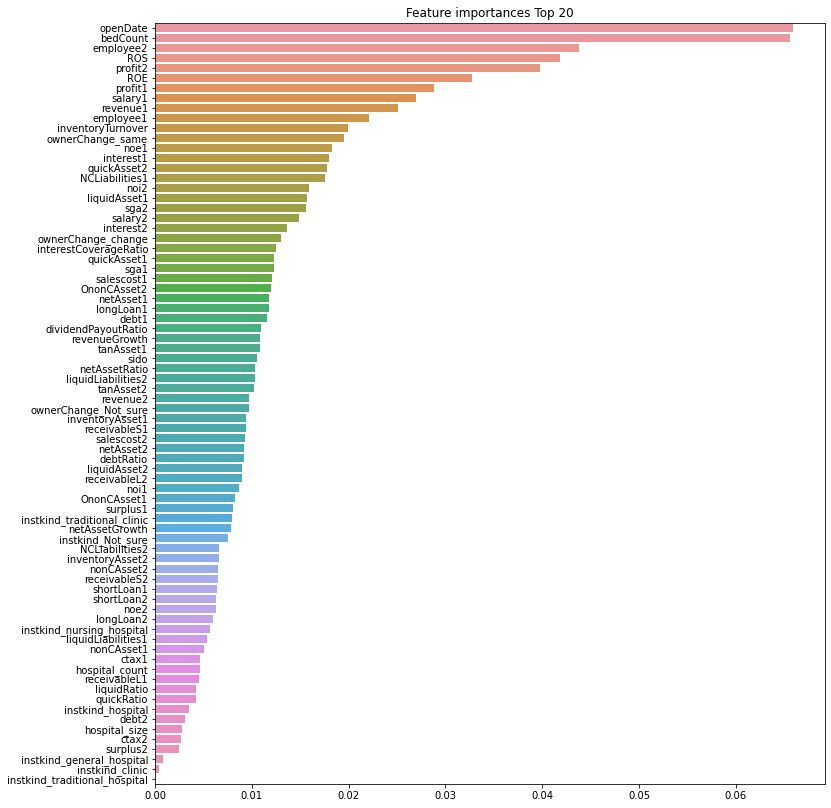

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf.feature_importances_ #피처 중요도
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(12,14))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[200],
    'max_depth':[4,6,8,10,12],
    'min_samples_leaf':[6,8,12,18],
    'min_samples_split':[4,8,16,20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 200}
최고 예측 정확도:0.944444


## (2) XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dtrain = xgb.DMatrix(data=X_train,label = y_train)
dtest = xgb.DMatrix(data=X_test,label = y_test)

In [ ]:
params = {
    'max_depth' :3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 400

In [ ]:
wlist=[(dtrain,'train'),(dtest,'eval')]
#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=num_rounds, early_stopping_rounds=100,evals=wlist)

[0]	train-logloss:0.61394	eval-logloss:0.613248
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.547818	eval-logloss:0.548044
[2]	train-logloss:0.493294	eval-logloss:0.493451
[3]	train-logloss:0.447312	eval-logloss:0.447376
[4]	train-logloss:0.408177	eval-logloss:0.408127
[5]	train-logloss:0.374192	eval-logloss:0.375762
[6]	train-logloss:0.343636	eval-logloss:0.346053
[7]	train-logloss:0.31683	eval-logloss:0.320333
[8]	train-logloss:0.294243	eval-logloss:0.298923
[9]	train-logloss:0.273338	eval-logloss:0.278387
[10]	train-logloss:0.255199	eval-logloss:0.261636
[11]	train-logloss:0.23864	eval-logloss:0.245616
[12]	train-logloss:0.224826	eval-logloss:0.231851
[13]	train-logloss:0.212114	eval-logloss:0.219241
[14]	train-logloss:0.19917	eval-logloss:0.209545
[15]	train-logloss:0.18897	eval-logloss:0.199735
[16]	train-logloss:0.178416	eval-logloss:0.19171
[17]	train-loglo

In [ ]:
pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 활률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.986 0.988 0.988 0.989 0.977 0.965 0.988 0.987 0.957 0.989]
예측값 10개만 표시: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None): #평가 한번에 호출하는 함수
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  #ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test,preds,pred_probs)

오차행렬
[[ 0  2]
 [ 1 56]]
정확도 : 0.9492, 정밀도 : 0.9655, 재현율:0.9825, F1 : 0.9739, AUC : 0.8509


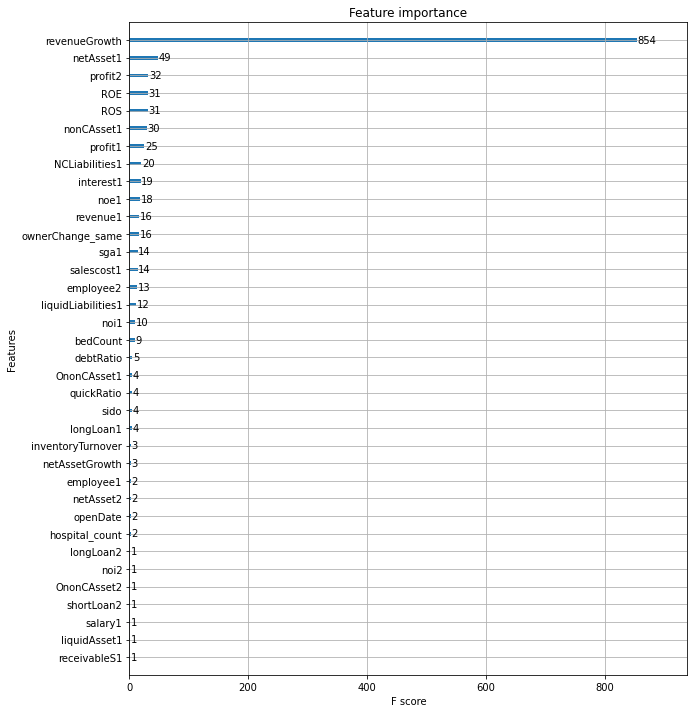

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

In [ ]:
xgb.cv(params,dtrain,num_boost_round=10,nfold=3,stratified=False,metrics=(),obj=None,feval=None,maximize=False,early_stopping_rounds=None,fpreproc=None,as_pandas=True,verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.61,0.00,0.62,0.00
1,0.55,0.00,0.56,0.01
2,0.49,0.01,0.52,0.01
3,0.44,0.01,0.48,0.01
4,0.40,0.01,0.44,0.02
5,0.37,0.01,0.41,0.02
6,0.34,0.01,0.39,0.02
7,0.31,0.01,0.36,0.02
8,0.29,0.01,0.34,0.02
9,0.26,0.01,0.33,0.02


## (3) LightGBM

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 앞서 XGBoost와 동일하게 n_estimators는 400설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기중단 수행가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train,
                 early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.195205	valid_0's binary_logloss: 0.195205
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.186759	valid_0's binary_logloss: 0.186759
[3]	valid_0's binary_logloss: 0.18356	valid_0's binary_logloss: 0.18356
[4]	valid_0's binary_logloss: 0.181449	valid_0's binary_logloss: 0.181449
[5]	valid_0's binary_logloss: 0.179433	valid_0's binary_logloss: 0.179433
[6]	valid_0's binary_logloss: 0.178342	valid_0's binary_logloss: 0.178342
[7]	valid_0's binary_logloss: 0.177498	valid_0's binary_logloss: 0.177498
[8]	valid_0's binary_logloss: 0.177486	valid_0's binary_logloss: 0.177486
[9]	valid_0's binary_logloss: 0.178126	valid_0's binary_logloss: 0.178126
[10]	valid_0's binary_logloss: 0.177365	valid_0's binary_logloss: 0.177365
[11]	valid_0's binary_logloss: 0.174697	valid_0's binary_logloss: 0.174697
[12]	valid_0's binary_logloss: 0.174966	valid_0's binary_logloss: 0.174966
[13]	valid_0's binary_logloss: 0.175158	valid_0'

In [ ]:
get_clf_eval(y_test,preds,pred_proba)

오차행렬
[[ 0  3]
 [ 0 56]]
정확도 : 0.9492, 정밀도 : 0.9492, 재현율:1.0000, F1 : 0.9739, AUC : 0.8333


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_wrapper = LGBMClassifier(n_estimators=400)

params = {
    'num_leaves':[32,64],
    'max_depth':[128, 160], 
    'min_child_samples':[60,100],
    'subsample':[0.8,1]
}

# cv는 3으로 지정
gridcv= GridSearchCV(lgbm_wrapper, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, 
           early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average="macro")
print("ROC AUC : {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.733032	valid_0's binary_logloss: 0.21031	valid_1's auc: 0.574561	valid_1's binary_logloss: 0.152988
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.790115	valid_0's binary_logloss: 0.207675	valid_1's auc: 0.429825	valid_1's binary_logloss: 0.156241
[3]	valid_0's auc: 0.790115	valid_0's binary_logloss: 0.204345	valid_1's auc: 0.429825	valid_1's binary_logloss: 0.15546
[4]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.20124	valid_1's auc: 0.464912	valid_1's binary_logloss: 0.154772
[5]	valid_0's auc: 0.848764	valid_0's binary_logloss: 0.199237	valid_1's auc: 0.394737	valid_1's binary_logloss: 0.157973
[6]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.196607	valid_1's auc: 0.464912	valid_1's binary_logloss: 0.157518
[7]	valid_0's auc: 0.848764	valid_0's binary_logloss: 0.194176	valid_1's auc: 0.394737	valid_1's binary_logloss: 0.157146
[8]	valid_0's auc: 0.848764	valid_0's binary_logloss: 0.192633	valid_1's auc: 0.394737	

light gbm GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=400,max_depth= 128, min_child_samples=60, num_leaves= 32, subsample= 0.8)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train,
             early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average="macro")
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.469298	valid_0's binary_logloss: 0.153974
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.714912	valid_0's binary_logloss: 0.153577
[3]	valid_0's auc: 0.377193	valid_0's binary_logloss: 0.156645
[4]	valid_0's auc: 0.377193	valid_0's binary_logloss: 0.15749
[5]	valid_0's auc: 0.359649	valid_0's binary_logloss: 0.159161
[6]	valid_0's auc: 0.438596	valid_0's binary_logloss: 0.158552
[7]	valid_0's auc: 0.394737	valid_0's binary_logloss: 0.161554
[8]	valid_0's auc: 0.372807	valid_0's binary_logloss: 0.162307
[9]	valid_0's auc: 0.381579	valid_0's binary_logloss: 0.162015
[10]	valid_0's auc: 0.390351	valid_0's binary_logloss: 0.164492
[11]	valid_0's auc: 0.390351	valid_0's binary_logloss: 0.165517
[12]	valid_0's auc: 0.416667	valid_0's binary_logloss: 0.165942
[13]	valid_0's auc: 0.495614	valid_0's binary_logloss: 0.163751
[14]	valid_0's auc: 0.434211	valid_0's binary_logloss: 0.165714
[15]	valid_0's auc: 0.508772	valid_0's binary_loglo

In [ ]:
preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test,preds,pred_proba)

오차행렬
[[ 0  2]
 [ 0 57]]
정확도 : 0.9661, 정밀도 : 0.9661, 재현율:1.0000, F1 : 0.9828, AUC : 0.7149


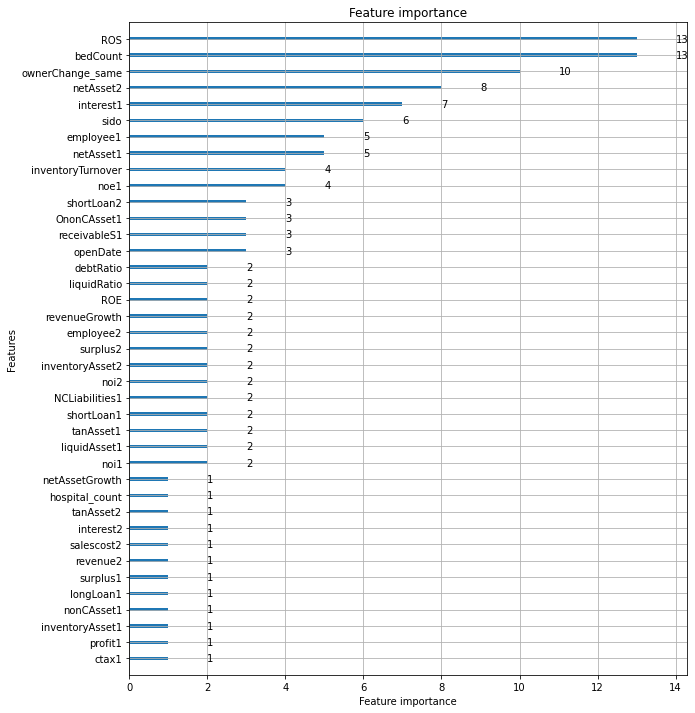

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# cv는 3으로 지정
gridcv= GridSearchCV(lgbm_wrapper, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, 
           early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average="macro")
print("ROC AUC : {0:.4f}".format(lgbm_roc_score))

ValueError: ignored